In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
'''Set parameters:

     The file to be read contains the following columns:
    1. experiment
    2. position in the microscope
    3. mother cell (same as cell number when it is the first of the lineage)
    4. cell number
    5-n. timepoints measured 
    
    num_timepoints: number of timepoints measured
    
'''
filename='MotherDaughterWT.txt'
num_timepoints=51

In [3]:
def partial_corr(momFluo,daughterFluo,MeanFluo):
    A = np.vstack([MeanFluo, np.ones(len(MeanFluo))]).T
    #Linear Regression to controlling variable
    beta_i = np.linalg.lstsq(A, momFluo,rcond=-1)[0]
    beta_j = np.linalg.lstsq(A,daughterFluo,rcond=-1)[0]
    #Get the residues, whatever is not explained by the controlling variable
    res_j = momFluo - A.dot( beta_i)
    res_i = daughterFluo - A.dot(beta_j)
    #Calculate correlation of the residuals     
    corr = ss.pearsonr(res_i, res_j)[0]
    return corr

In [4]:
data=pd.read_table(filename,names=["exp","pos","mother","cell"]+list(range(num_timepoints)))
data.set_index(["exp","pos","mother","cell"],inplace=True)
mean_fluo=data.mean()
datadic=data.to_dict("index")

In [5]:
RelatedParCorr=[]
RelatedCorr=[]
for cell in datadic.keys():
    for cell2 in datadic.keys():
        exp,pos,mother,celln=cell
        fluo=list(datadic[cell].values())
        exp2,pos2,mother2,celln2=cell2
        fluo2=list(datadic[cell2].values())
        if exp==exp2 and pos==pos2 and mother2==mother and cell!=cell2:
            RelatedParCorr.append(partial_corr(fluo,fluo2,mean_fluo))
            RelatedCorr.append(ss.pearsonr(fluo, fluo2)[0])

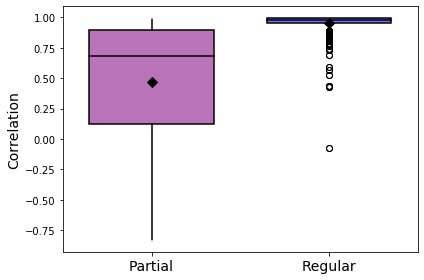

In [6]:

colors=["purple","blue"]
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='k',markersize=7)

box=plt.boxplot([RelatedParCorr,RelatedCorr],patch_artist=True,meanprops=meanpointprops,showmeans=True,widths=.7)
plt.setp(box['whiskers'], color='k', linewidth=1.5)
plt.setp(box['caps'], color='w', linewidth=1.5)
plt.setp(box['medians'], color='k', linewidth=1.5)
plt.ylabel('Correlation',fontsize=14)

for bx in box['boxes']:
    bx.set( color='k', linewidth=1.5) 

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .55))

plt.xticks([1,2],["Partial","Regular"],fontsize=14)  
plt.tight_layout()
plt.show()